In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import zipfile as zip
import keras.layers as kl
import numpy as np
import timeit
import tensorflow as tf
from keras.preprocessing import image
from PIL import Image
from collections import Counter
from keras.utils import to_categorical, plot_model
from keras.optimizers import *
from keras import Sequential
from keras.layers import Dropout, BatchNormalization
from keras.models import Model
from keras.backend import clear_session
from sklearn.model_selection import KFold

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp /content/kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.utils import shuffle
from skimage import exposure
import pickle

In [8]:
training_file = "/content/train.p"
testing_file = "/content/test.p"

In [9]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [10]:
X, y = train['features'], train['labels']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=4000, random_state=0)
# X_train, y_train = X, y

X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
# print("X_valid shape:", X_valid.shape)
# print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35209, 32, 32, 3)
y_train shape: (35209,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


In [11]:
# y_train = y_train.reshape(-1)
# y_test = y_test.reshape(-1)

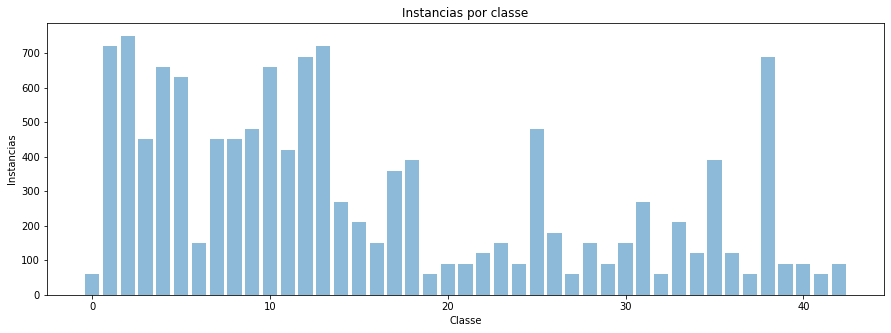

In [12]:
# Gráfico de instâncias por classe
plt.figure(figsize=(15,5))
plt.bar(Counter(y_test).keys(), Counter(y_test).values(), align='center', alpha=0.5)
plt.ylabel('Instancias')
plt.xlabel('Classe')
plt.title('Instancias por classe')
plt.show()

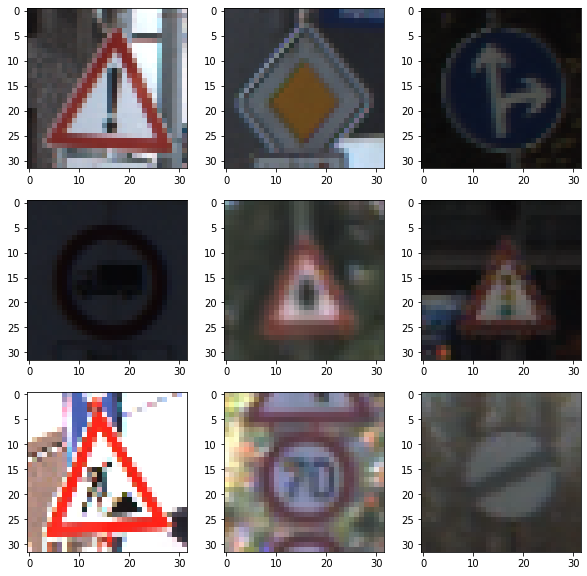

In [13]:
# Apresenta 9 imagens do dataset em escala de cinza
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_valid = X_valid.astype('float32')

X_train /= 255
# X_valid /= 255
X_test /= 255

print(X_train.shape, 'train samples')
# print(X_valid.shape, 'Valid samples')
print(X_test.shape, 'test samples')
print()
print(y_train.shape, 'y train samples')
# print(y_valid.shape, 'y Valid samples')
print(y_test.shape, 'y test samples')

(35209, 32, 32, 3) train samples
(12630, 32, 32, 3) test samples

(35209,) y train samples
(12630,) y test samples


In [15]:
num_classes = len(Counter(y_test))

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# y_valid = to_categorical(y_test, num_classes)

print(num_classes)

43


In [16]:
def get_model(num_labels = 43, input_shape = (32,32,3), optimizer=RMSprop()):
  clear_session()
  
  # model = Sequential()
  # model.add(kl.Input(input_shape))
  # model.add(kl.Conv2D(32, (3,3), padding="same", activation='elu'))
  # model.add(Dropout(0.2))
  # model.add(kl.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
  # model.add(Dropout(0.2))
  # model.add(kl.Conv2D(64, (3,3), padding="same", activation='elu'))
  # model.add(Dropout(0.3))
  # model.add(kl.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
  # model.add(kl.Conv2D(128, (3,3), padding="same", activation='elu'))
  # model.add(Dropout(0.3))
  # model.add(kl.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
  # model.add(kl.Flatten())
  # model.add(kl.Dense(128, activation='elu'))
  # model.add(Dropout(0.4))
  # model.add(kl.Dense(64, activation='elu'))
  # model.add(Dropout(0.4))
  # model.add(kl.Dense(num_labels, activation='softmax'))

  model = Sequential()
  model.add(kl.Input(input_shape))
  model.add(kl.Conv2D(64, (3, 3), activation='relu'))
  model.add(kl.MaxPool2D((2, 2)))
  model.add(kl.Flatten())
  model.add(kl.Dense(64, activation='relu'))
  model.add(kl.Dense(43, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

  # Retornando o modelo
  return model
  

In [17]:
model = get_model(num_classes, X_test.shape[1:], optimizer=Adam())

# Quantidade de épocas
epochs = 30
# Batch size para treinamento
bs = 100

# Computando o tempo para treinar (início)
start = timeit.default_timer()

# Treinando o modelo, e armazenando o resultado do treinamento em uma variável
hist = model.fit(X_train, y_train,
                 epochs = epochs,
                 batch_size = bs,
                 validation_split= 0.20,
                 verbose=1)

# Computando o tempo para treinar (fim)
stop = timeit.default_timer()

# Apresentando o tempo de treinamento
print('Tempo: ', stop - start)  

Epoch 1/30
282/282 [==============================] - 28s 98ms/step - loss: 2.4520 - accuracy: 0.3936 - val_loss: 0.6893 - val_accuracy: 0.8253
Epoch 2/30
282/282 [==============================] - 27s 96ms/step - loss: 0.5534 - accuracy: 0.8642 - val_loss: 0.3195 - val_accuracy: 0.9291
Epoch 3/30
282/282 [==============================] - 27s 97ms/step - loss: 0.2637 - accuracy: 0.9401 - val_loss: 0.2355 - val_accuracy: 0.9421
Epoch 4/30
282/282 [==============================] - 27s 97ms/step - loss: 0.1653 - accuracy: 0.9646 - val_loss: 0.1783 - val_accuracy: 0.9614
Epoch 5/30
282/282 [==============================] - 27s 96ms/step - loss: 0.1115 - accuracy: 0.9753 - val_loss: 0.1511 - val_accuracy: 0.9679
Epoch 6/30
282/282 [==============================] - 27s 96ms/step - loss: 0.0852 - accuracy: 0.9831 - val_loss: 0.1419 - val_accuracy: 0.9665
Epoch 7/30
282/282 [==============================] - 27s 95ms/step - loss: 0.0687 - accuracy: 0.9843 - val_loss: 0.1503 - val_accuracy:

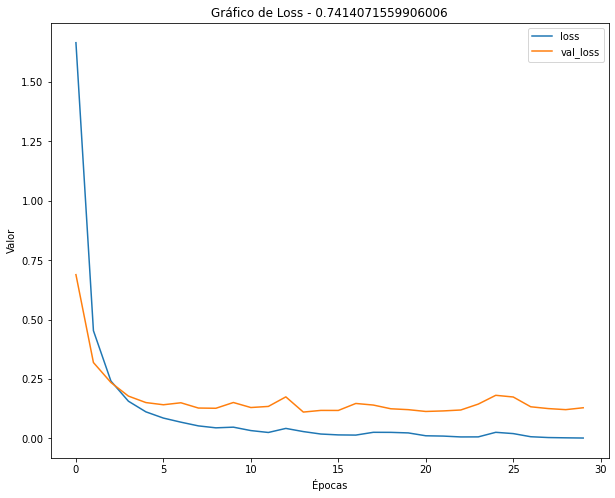

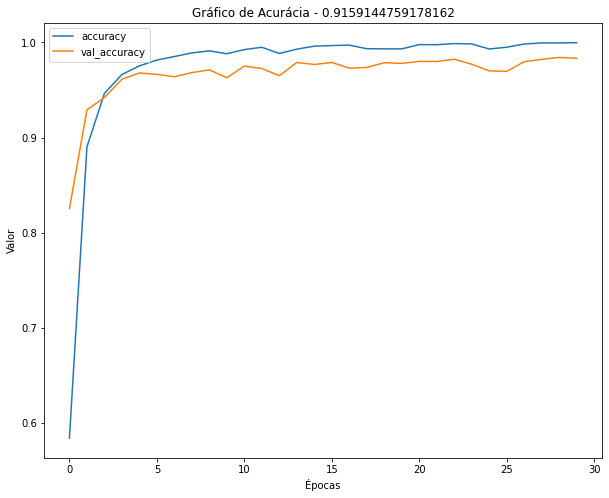

In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)

# Gráfico de loss
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Loss - {scores[0]}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# Gráfico de acurácia
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Acurácia - {scores[1]}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()